In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb
import lightgbm as lgb

In [3]:
# Importing regression models from sklearn
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,HistGradientBoostingRegressor,AdaBoostRegressor
from sklearn.svm import SVR

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [6]:
df = pd.read_csv('emp_performance_dataset.csv')
df.head()

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,...,department_finishing,department_finishing,department_sweing,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday,actual_productivity
0,9,0.75,3.94,NaN,960,0,0.0,0,0,8.0,...,1,0,0,0,0,0,0,0,1,0.755167
1,7,0.65,30.10,909.0,7080,0,0.0,0,1,59.0,...,0,0,1,0,0,0,1,0,0,0.535678
2,3,0.80,4.15,NaN,1440,0,0.0,0,0,7.0,...,0,1,0,0,0,0,0,0,1,0.820833
3,1,0.65,22.53,762.0,5040,0,0.0,0,1,42.0,...,0,0,1,0,0,0,0,0,1,0.581131
4,4,0.70,30.10,767.0,3300,50,0.0,0,1,57.0,...,0,0,1,1,0,0,0,0,0,0.790003


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017 entries, 0 to 1016
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   team                   1017 non-null   int64  
 1   targeted_productivity  1017 non-null   float64
 2   smv                    1017 non-null   float64
 3   wip                    594 non-null    float64
 4   over_time              1017 non-null   int64  
 5   incentive              1017 non-null   int64  
 6   idle_time              1017 non-null   float64
 7   idle_men               1017 non-null   int64  
 8   no_of_style_change     1017 non-null   int64  
 9   no_of_workers          1017 non-null   float64
 10  month                  1017 non-null   int64  
 11  quarter_Quarter1       1017 non-null   int64  
 12  quarter_Quarter2       1017 non-null   int64  
 13  quarter_Quarter3       1017 non-null   int64  
 14  quarter_Quarter4       1017 non-null   int64  
 15  quar

- Cheching unique values

In [8]:
df.nunique()

team                      12
targeted_productivity      9
smv                       67
wip                      489
over_time                137
incentive                 47
idle_time                 11
idle_men                   9
no_of_style_change         3
no_of_workers             60
month                      3
quarter_Quarter1           2
quarter_Quarter2           2
quarter_Quarter3           2
quarter_Quarter4           2
quarter_Quarter5           2
department_finishing       2
department_finishing       2
department_sweing          2
day_Monday                 2
day_Saturday               2
day_Sunday                 2
day_Thursday               2
day_Tuesday                2
day_Wednesday              2
actual_productivity      763
dtype: int64

- Checking for null values

In [9]:
df.isnull().sum()

team                       0
targeted_productivity      0
smv                        0
wip                      423
over_time                  0
incentive                  0
idle_time                  0
idle_men                   0
no_of_style_change         0
no_of_workers              0
month                      0
quarter_Quarter1           0
quarter_Quarter2           0
quarter_Quarter3           0
quarter_Quarter4           0
quarter_Quarter5           0
department_finishing       0
department_finishing       0
department_sweing          0
day_Monday                 0
day_Saturday               0
day_Sunday                 0
day_Thursday               0
day_Tuesday                0
day_Wednesday              0
actual_productivity        0
dtype: int64

- Replacing null values in wip with it's mean



In [10]:
df['wip'] = df['wip'].fillna(df['wip'].mean())

- plotting histogram of actual productivity

[Text(0.5, 1.0, 'Actual Productivity')]

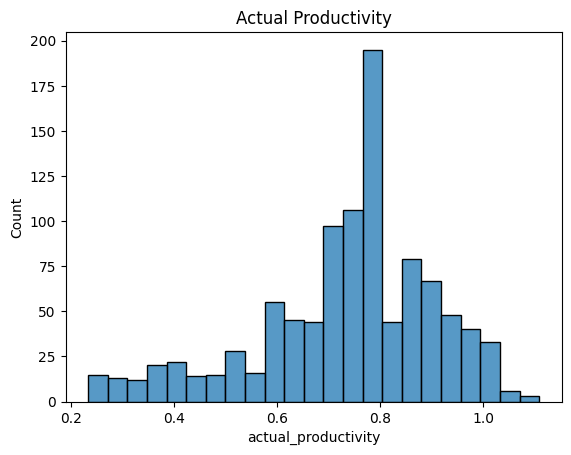

In [11]:
sns.histplot(
    df['actual_productivity'],
    kde=False
).set(title='Actual Productivity')

- Checking correlation between attributes using a heatmap

<AxesSubplot: >

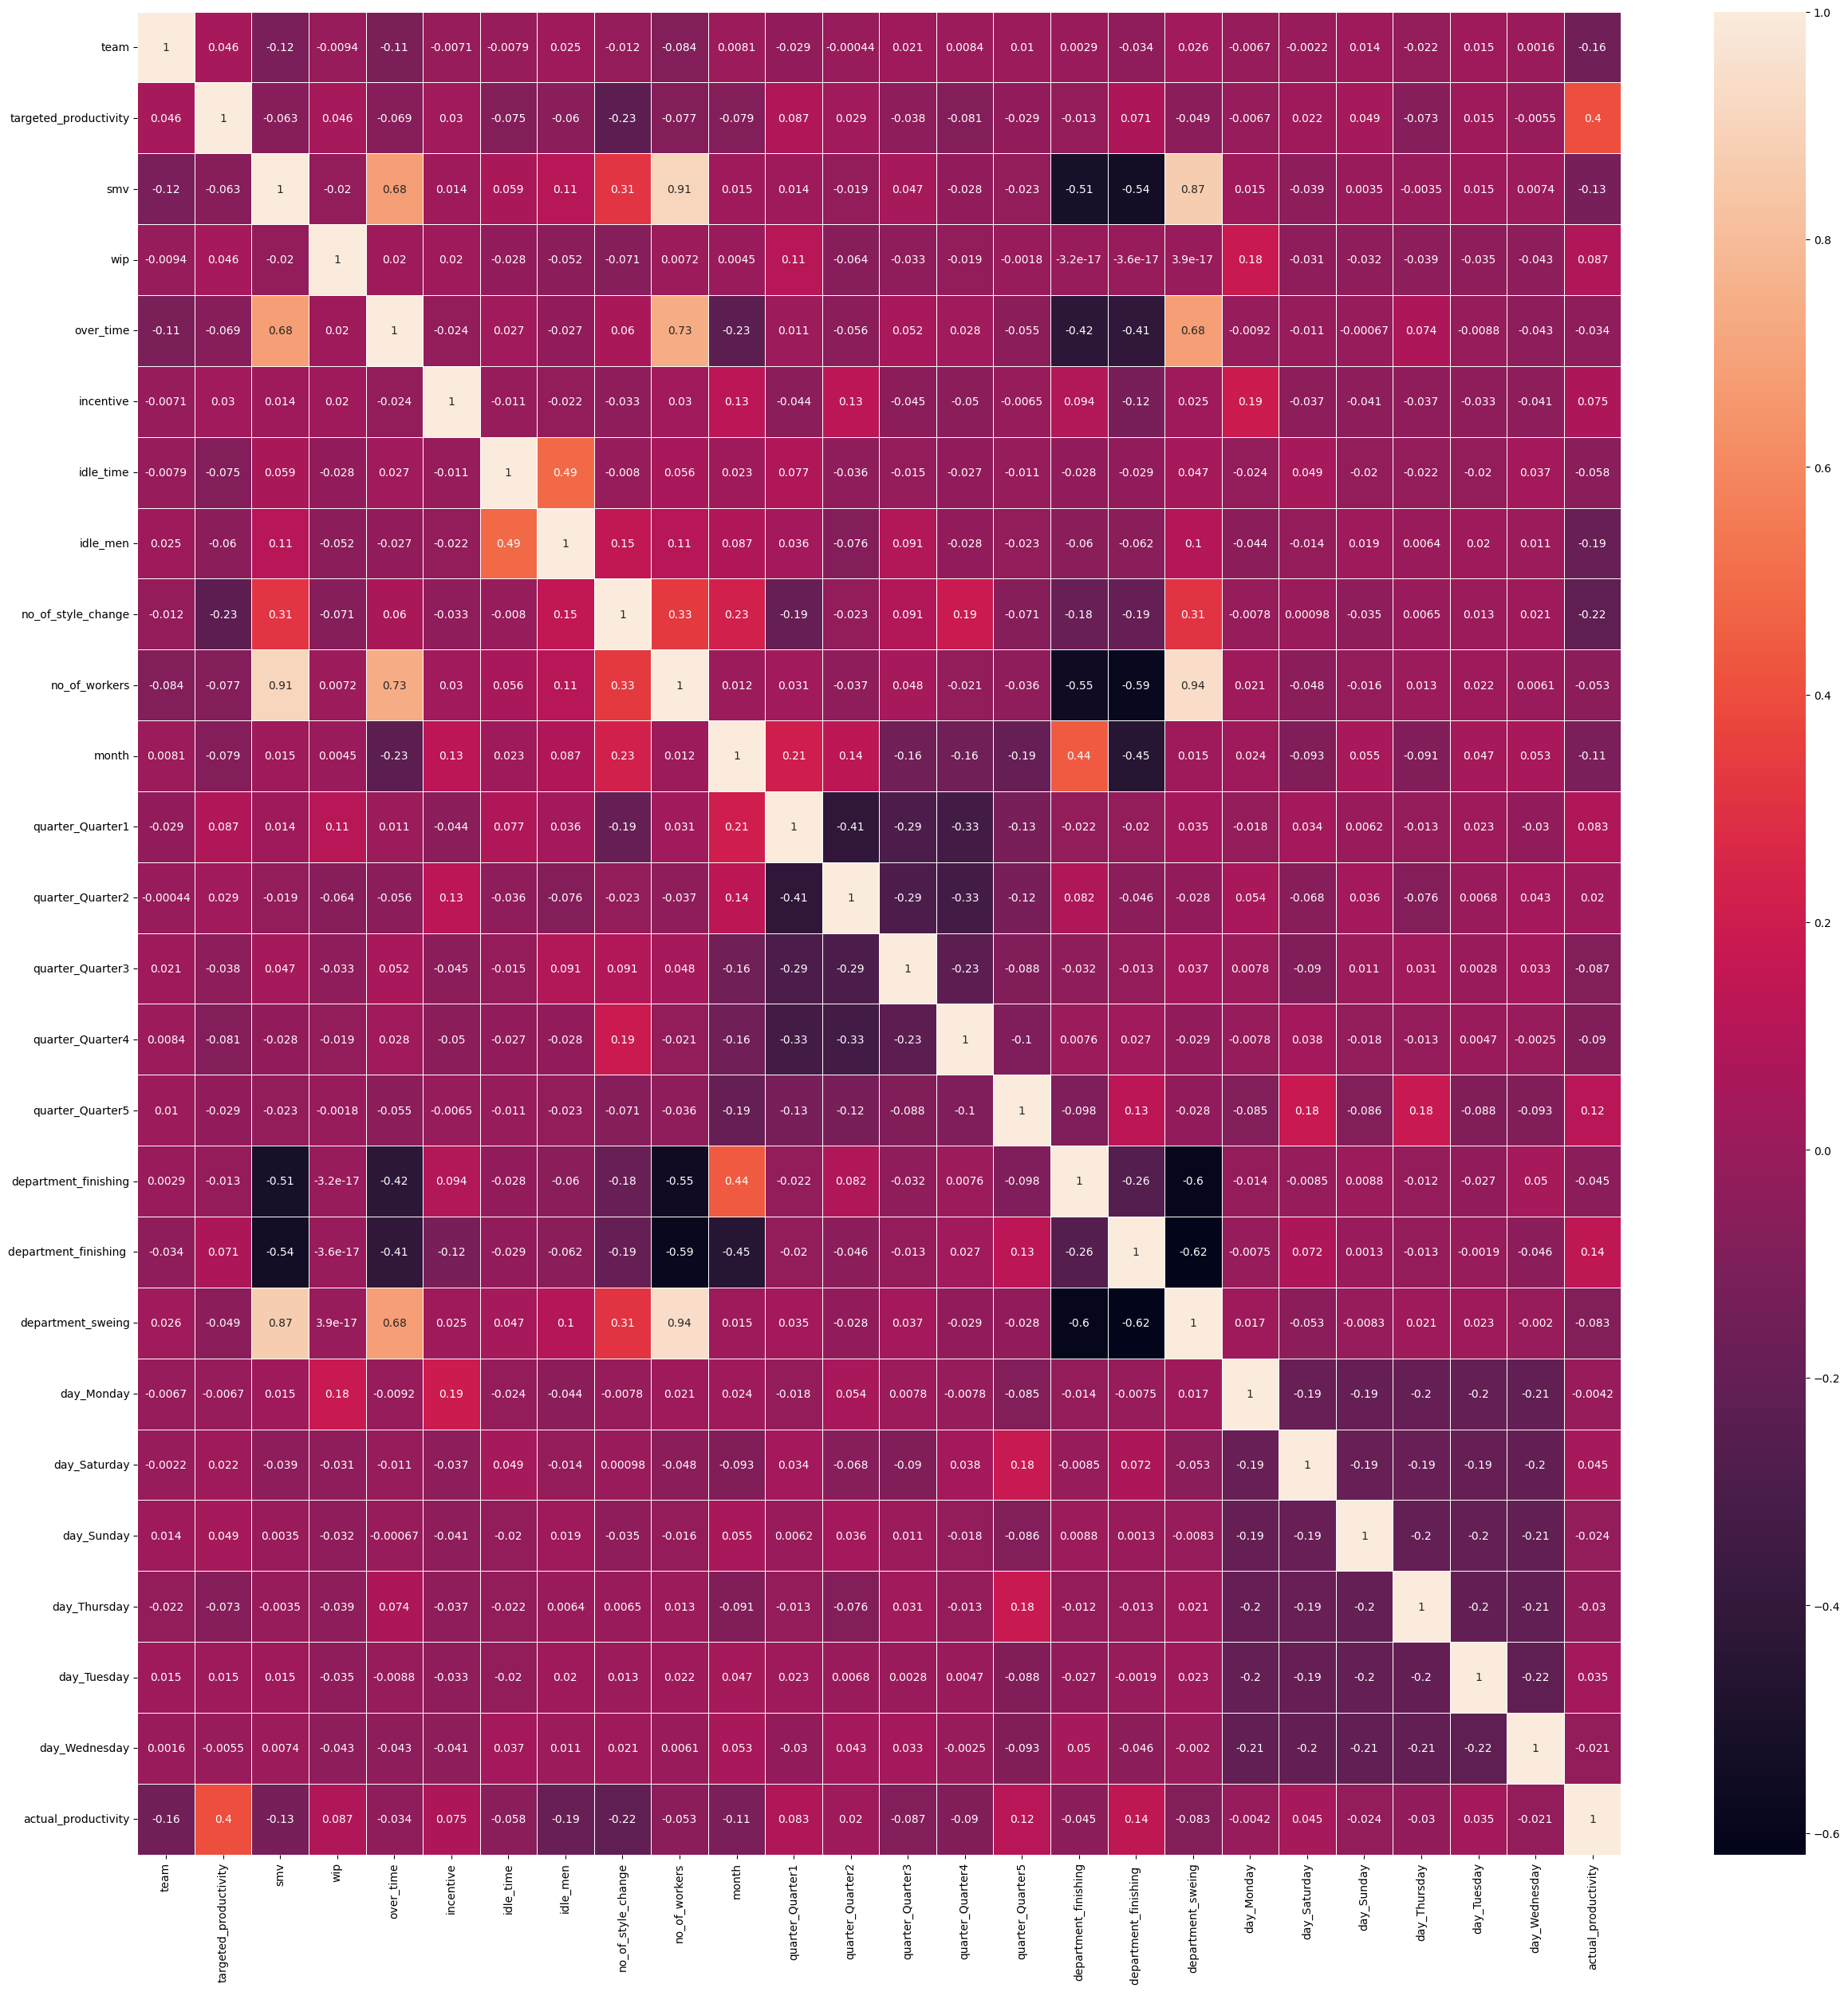

In [12]:
corrMatrix = df.corr()
fig, ax = plt.subplots(figsize = (30, 30))
sns.heatmap(corrMatrix, annot=True, linewidths=.5, ax=ax)

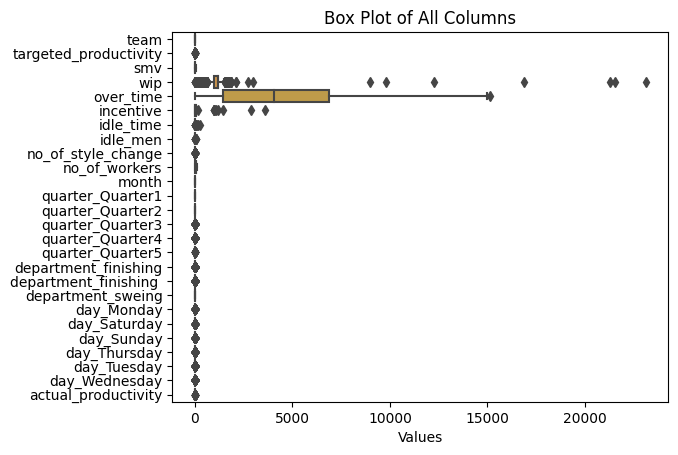

In [13]:
sns.boxplot(data=df, orient='h') 

plt.xlabel('Values')
plt.title('Box Plot of All Columns')
plt.show()

In [14]:
df.describe()

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,...,department_finishing,department_finishing,department_sweing,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday,actual_productivity
count,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,...,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000
mean,6.443461,0.730747,15.150492,1183.183502,4532.940020,40.689282,0.564405,0.398230,0.160275,34.846116,...,0.201573,0.214356,0.584071,0.161259,0.152409,0.164208,0.165192,0.171091,0.185841,0.736509
std,3.472473,0.097384,10.946096,1370.450653,3275.997333,173.240655,10.093731,3.351712,0.440199,22.185292,...,0.401373,0.410577,0.493124,0.367950,0.359594,0.370647,0.371536,0.376774,0.389169,0.174304
min,1.000000,0.070000,2.900000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.233705
25%,3.000000,0.700000,3.940000,963.000000,1440.000000,0.000000,0.000000,0.000000,0.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.651515
50%,7.000000,0.750000,15.260000,1183.183502,4080.000000,0.000000,0.000000,0.000000,0.000000,34.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.773333
75%,9.000000,0.800000,24.260000,1183.183502,6900.000000,50.000000,0.000000,0.000000,0.000000,57.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.850170
max,12.000000,0.800000,54.560000,23122.000000,15120.000000,3600.000000,270.000000,45.000000,2.000000,89.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.108125


In [15]:
df.head()
X = np.array(df.drop(['actual_productivity'], axis=1, inplace=False))
y = np.array(df['actual_productivity'])


In [16]:
# X.head()
# X.shape()

In [17]:
# y.head()
# y.shape

In [18]:
df.isnull().sum()

team                     0
targeted_productivity    0
smv                      0
wip                      0
over_time                0
incentive                0
idle_time                0
idle_men                 0
no_of_style_change       0
no_of_workers            0
month                    0
quarter_Quarter1         0
quarter_Quarter2         0
quarter_Quarter3         0
quarter_Quarter4         0
quarter_Quarter5         0
department_finishing     0
department_finishing     0
department_sweing        0
day_Monday               0
day_Saturday             0
day_Sunday               0
day_Thursday             0
day_Tuesday              0
day_Wednesday            0
actual_productivity      0
dtype: int64

In [19]:
# spliting data in train and test data
# X = np.array(X)
# y = np.array(y)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)
X_train.shape
X_test.shape

(204, 25)

- Getting all the regressors

In [21]:
lr = LinearRegression()
dtr = DecisionTreeRegressor()
knr = KNeighborsRegressor()
rfr = RandomForestRegressor()
svr = SVR()

In [22]:
# training on all the regressors
for regressor in (lr, dtr, knr, rfr, svr):
    regressor.fit(X_train, y_train)
    print(f'{regressor} score: {regressor.score(X_test, y_test) * 100}%')

LinearRegression() score: 14.85686859816161%
DecisionTreeRegressor() score: 1.4995889453691014%
KNeighborsRegressor() score: 19.261320235459156%
RandomForestRegressor() score: 31.536750300910775%
SVR() score: 11.019300437287905%


In [23]:
from lazypredict.Supervised import LazyRegressor

In [24]:
lazyr = LazyRegressor()
models,predictions = lazyr.fit(X_train, X_test, y_train, y_test)
models

 98%|█████████▊| 41/42 [00:39<00:00,  1.04it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001154 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 417
[LightGBM] [Info] Number of data points in the train set: 813, number of used features: 23
[LightGBM] [Info] Start training from score 0.733224
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

100%|██████████| 42/42 [00:39<00:00,  1.07it/s]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
GradientBoostingRegressor,0.28,0.37,0.14,0.16
HistGradientBoostingRegressor,0.23,0.33,0.15,1.30
LGBMRegressor,0.22,0.31,0.15,0.35
RandomForestRegressor,0.20,0.30,0.15,0.35
AdaBoostRegressor,0.16,0.27,0.16,0.04
ExtraTreesRegressor,0.15,0.25,0.16,0.31
BaggingRegressor,0.14,0.24,0.16,0.03
XGBRegressor,0.06,0.17,0.17,0.35
NuSVR,0.06,0.17,0.17,0.08


In [25]:
Gr = GradientBoostingRegressor()
Hgr = HistGradientBoostingRegressor()
Ada = AdaBoostRegressor()
knr = KNeighborsRegressor()
xbgi = xgb.XGBRegressor
Lgbmr = lgb.LGBMRegressor

In [26]:
print("GradientBoostingRegressor")
Gr.fit(X, y)
y_pred = Gr.predict(X)
MSEGr=mean_squared_error(y_pred, y)
print('MSE for GradientBoostingRegressor	: ', MSEGr)
R2Gr=r2_score(y_pred, y)
print('R2 for GradientBoostingRegressor	: ', R2Gr)


print(" HistGradientBoostingRegressor")
Hgr.fit(X, y)
y_pred = Hgr.predict(X)
MSEHGr=mean_squared_error(y_pred, y)
print('MSE HistGradientBoostingRegressor	: ', MSEHGr)
R2HGr=r2_score(y_pred, y)
print('R2 for HistGradientBoostingRegressor	: ', R2HGr)

print('AdaBoostRegressor')
Ada.fit(X, y)
y_pred = Ada.predict(X)
MSEada=mean_squared_error(y_pred, y)
print('MSE for AdaBoostRegressor	: ', MSEada)
R2ada=r2_score(y_pred, y)
print('R2 for AdaBoostRegressor	: ', R2ada)

print('KNeighborsRegressor')
knr.fit(X, y)
y_pred = knr.predict(X)
MSEknr=mean_squared_error(y_pred, y)
print('MSE for KNeighborsRegressor: ', MSEknr)
R2knr=r2_score(y_pred, y)
print('R2 for KNeighborsRegressor: ', R2knr)

GradientBoostingRegressor
MSE for GradientBoostingRegressor	:  0.009968464773837726
R2 for GradientBoostingRegressor	:  0.4008128877468501
 HistGradientBoostingRegressor
MSE HistGradientBoostingRegressor	:  0.005142214241329054
R2 for HistGradientBoostingRegressor	:  0.7550591906283303
AdaBoostRegressor
MSE for AdaBoostRegressor	:  0.01690607717623489
R2 for AdaBoostRegressor	:  -0.602933391081478
KNeighborsRegressor
MSE for KNeighborsRegressor:  0.016849722870148895
R2 for KNeighborsRegressor:  -0.33338838704006135


- XGBregressor

In [29]:
xgb_r = xgb.XGBRegressor(objective ='reg:pseudohubererror',
                    n_estimators = 10, seed = 123)

xgb_r.fit(X_train, y_train)
pred = xgb_r.predict(X_test)

xgbmse = mean_squared_error(y_test, pred)
xgbrsqure = r2_score(y_test, pred)

print(f"MSE : {xgbmse}")
print(f'rsquare XGB: {xgbrsqure}')



MSE : 0.02149314930921567
rsquare XGB: 0.35280962931648674


In [30]:
# XGBoost is found to be the best model so far with the least MSE, highest r2 score

In [31]:
# traininig the XGB Regressor on the entire datatset

In [32]:
model = xgb.XGBRegressor(objective ='reg:pseudohubererror',
                    n_estimators = 10, seed = 123)
model.fit(X, y)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=10, n_jobs=None, num_parallel_tree=None,
             objective='reg:pseudohubererror', predictor=None, ...)

In [33]:
pred = model.predict(X)

xgbmse = mean_squared_error(y, pred)
xgbrsqure = r2_score(y, pred)

print(f"MSE : {xgbmse}")
print(f'rsquare XGB: {xgbrsqure}')

MSE : 0.006823922059574985
rsquare XGB: 0.7751735311312644


### Saving the model

In [34]:
import pickle
pickle.dump(model, open('model.pkl', 'wb'))

In [35]:
df.head()

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,...,department_finishing,department_finishing,department_sweing,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday,actual_productivity
0,9,0.75,3.94,1183.18,960,0,0.00,0,0,8.00,...,1,0,0,0,0,0,0,0,1,0.76
1,7,0.65,30.10,909.00,7080,0,0.00,0,1,59.00,...,0,0,1,0,0,0,1,0,0,0.54
2,3,0.80,4.15,1183.18,1440,0,0.00,0,0,7.00,...,0,1,0,0,0,0,0,0,1,0.82
3,1,0.65,22.53,762.00,5040,0,0.00,0,1,42.00,...,0,0,1,0,0,0,0,0,1,0.58
4,4,0.70,30.10,767.00,3300,50,0.00,0,1,57.00,...,0,0,1,1,0,0,0,0,0,0.79


In [36]:
df.describe()

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,...,department_finishing,department_finishing,department_sweing,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday,actual_productivity
count,1017.00,1017.00,1017.00,1017.00,1017.00,1017.00,1017.00,1017.00,1017.00,1017.00,...,1017.00,1017.00,1017.00,1017.00,1017.00,1017.00,1017.00,1017.00,1017.00,1017.00
mean,6.44,0.73,15.15,1183.18,4532.94,40.69,0.56,0.40,0.16,34.85,...,0.20,0.21,0.58,0.16,0.15,0.16,0.17,0.17,0.19,0.74
std,3.47,0.10,10.95,1370.45,3276.00,173.24,10.09,3.35,0.44,22.19,...,0.40,0.41,0.49,0.37,0.36,0.37,0.37,0.38,0.39,0.17
min,1.00,0.07,2.90,7.00,0.00,0.00,0.00,0.00,0.00,2.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.23
25%,3.00,0.70,3.94,963.00,1440.00,0.00,0.00,0.00,0.00,9.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.65
50%,7.00,0.75,15.26,1183.18,4080.00,0.00,0.00,0.00,0.00,34.00,...,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.77
75%,9.00,0.80,24.26,1183.18,6900.00,50.00,0.00,0.00,0.00,57.00,...,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.85
max,12.00,0.80,54.56,23122.00,15120.00,3600.00,270.00,45.00,2.00,89.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.11


### Testing the saved model

In [70]:
# sample_test = np.array([
#     5, 0.9, 20, 1000, 3000, 50, 0.2,  0.3, 0.3, 37, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1
# ])

sample_test = np.array(df.iloc[853][:-1])
# print(len(sample_test))
# print(sample_test)
pickle_model = pickle.load(open('model.pkl', 'rb'))

productivity = pickle_model.predict([sample_test])

print(f'{productivity[0] * 100}%')

84.38885807991028%
